In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
glass_data = pd.read_csv("glass.csv")

# Drop rows with missing values
glass_clean = glass_data.dropna()

In [12]:
# Separate features and target
X = glass_clean.drop("Type", axis=1)
y = glass_clean["Type"]

# EDA Summary
print("=== EDA Summary ===")
print(X.describe())

=== EDA Summary ===
       refractive index      Sodium   Magnesium    Aluminum     Silicon  \
count        214.000000  214.000000  214.000000  214.000000  214.000000   
mean           1.518365   13.407850    2.684533    1.444907   72.650935   
std            0.003037    0.816604    1.442408    0.499270    0.774546   
min            1.511150   10.730000    0.000000    0.290000   69.810000   
25%            1.516522   12.907500    2.115000    1.190000   72.280000   
50%            1.517680   13.300000    3.480000    1.360000   72.790000   
75%            1.519157   13.825000    3.600000    1.630000   73.087500   
max            1.533930   17.380000    4.490000    3.500000   75.410000   

        Potassium     Calcium      Barium        Iron  
count  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009  
std      0.652192    1.423153    0.497219    0.097439  
min      0.000000    5.430000    0.000000    0.000000  
25%      0.122500    8.2

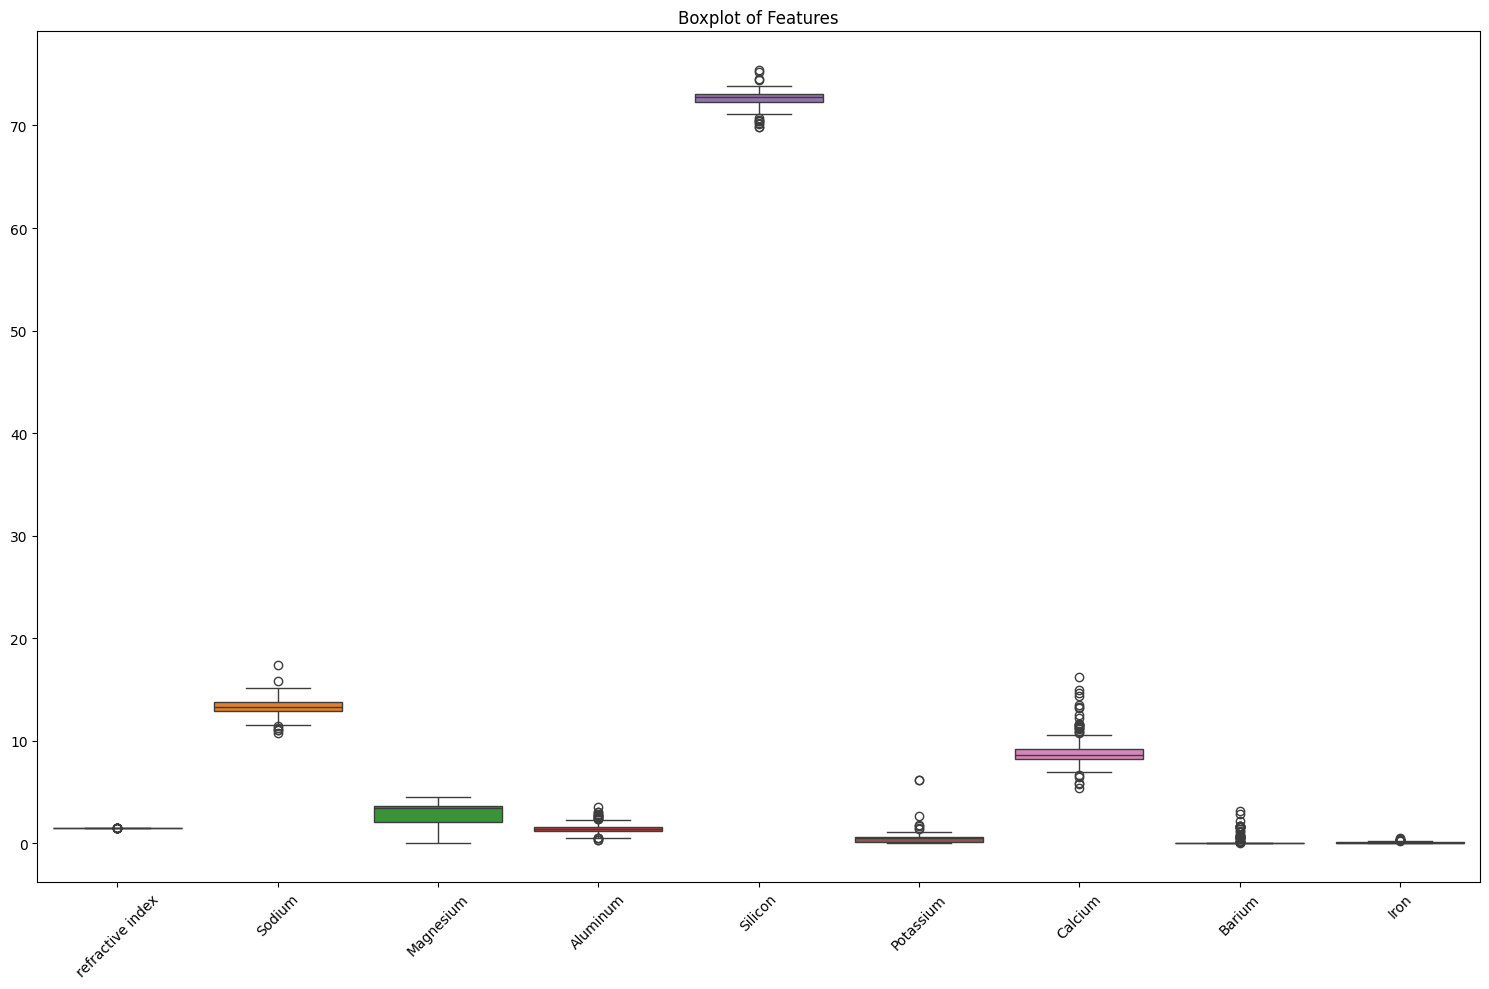

In [13]:

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.81373462, -0.72156039,  0.58057517, ..., -0.69513002,
         -0.35287683, -0.5864509 ],
        [ 0.32166886,  0.28495326,  0.59447339, ..., -0.0471626 ,
         -0.05049172,  1.88241125],
        [-0.06119975,  0.38314972, -1.86551055, ...,  1.43189347,
         -0.35287683, -0.5864509 ],
        ...,
        [-0.8203358 , -0.35332369,  0.50413499, ..., -0.39931881,
         -0.35287683,  1.36806497],
        [ 0.05102036,  0.83730832, -0.34365608, ...,  0.25569174,
         -0.35287683, -0.5864509 ],
        [-0.05459857, -0.96705153,  0.05244303, ...,  0.32612298,
         -0.35287683,  1.47093423]]),
 array([[-2.69137018e-01, -5.00618371e-01,  6.36168030e-01,
         -1.70460232e-01,  4.38786730e-01,  1.12106515e-01,
         -3.92275686e-01, -3.52876828e-01,  5.45110920e-01],
        [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00,
          1.79700922e+00,  8.14077586e-01, -7.63918639e-01,
         -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
        [ 1

In [9]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

         1.0       0.69      1.00      0.81        11
         2.0       0.90      0.64      0.75        14
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.75      0.86         4
         6.0       1.00      1.00      1.00         3
         7.0       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Random Forest Accuracy: 0.8372093023255814


In [10]:
# Bagging Classifier
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)
print("=== Bagging Classification Report ===")
print(classification_report(y_test, bag_pred))
print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))

=== Bagging Classification Report ===
              precision    recall  f1-score   support

         1.0       0.71      0.91      0.80        11
         2.0       0.85      0.79      0.81        14
         3.0       0.50      0.33      0.40         3
         5.0       1.00      0.75      0.86         4
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         8

    accuracy                           0.84        43
   macro avg       0.84      0.80      0.81        43
weighted avg       0.84      0.84      0.83        43

Bagging Accuracy: 0.8372093023255814


In [11]:
# Boosting Classifier (AdaBoost)
boosting = AdaBoostClassifier(random_state=42)
boosting.fit(X_train, y_train)
boost_pred = boosting.predict(X_test)
print("=== Boosting (AdaBoost) Classification Report ===")
print(classification_report(y_test, boost_pred))
print("Boosting Accuracy:", accuracy_score(y_test, boost_pred))

=== Boosting (AdaBoost) Classification Report ===
              precision    recall  f1-score   support

         1.0       0.47      0.82      0.60        11
         2.0       0.50      0.36      0.42        14
         3.0       0.00      0.00      0.00         3
         5.0       0.33      0.25      0.29         4
         6.0       0.00      0.00      0.00         3
         7.0       0.73      1.00      0.84         8

    accuracy                           0.53        43
   macro avg       0.34      0.40      0.36        43
weighted avg       0.45      0.53      0.47        43

Boosting Accuracy: 0.5348837209302325


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
